<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Problem I: Monte Carlo Simulation</h2>


<h3 style="font-family:chalkduster; color:steelblue">A) Overbooking Penalty</h3>
    
An airline has to fill seats on an airplane route as its source of revenue. The airline sells the tickets at \\$500 per ticket, and collects \\$250 per ticket sold as its revenue. However, it is well-established that some passengers may fail to turn up for their booked flight due to illness, last-minute cancellations or emergencies. In order to collect more money, the airline can choose to sell tickets in <b><i>excess</i></b> of the plane's actual capacity.

However, in the event that more ticket-carrying passengers show up than there are seats, the airline has to arrange for alternative transport and compensation for these excess passengers at the airline's expense. This is known as the "Overbooking Penalty", and it is expressed as a certain fraction (larger than 1) of the ticket price. (e.g. an "Overbooking Penalty" of 1.25 means that the airline has to pay 125\% of the price of the ticket it sold as a penalty.)

As an employee in the airline's finance department, you were tasked to utilize the Monte Carlo method to determine what is the optimal number of excess tickets the airline should sell to maximize its profits. Your boss further requested that you do a write up (i.e. in markdown, before/integrated with the code) that explains all the decisions you made when creating the model on which to run the Monte Carlo simulation. Amongst the points you would need to clarify include (but is not limited to):
    
- Where exactly does the random sampling come into your model.
    - Basically, <b><i>what</i></b> are you randomly sampling?
    - If you have a portion in your code where you're doing a systematic optimization instead of random sampling, this write-up should clearly distinguish between the random sampling approach and the systematic optimization.
    - This does <b><i>not</i></b> mean that your solution needs to have a systematic optimization portion/section. There are, as always, many ways to solve the problem!
    - Where random sampling is involved, what distribution will you be choosing from?
        - We learned only two distributions in our module (check out the powerpoint slides for Block II, Intro).
        - You need only use one of these distributions.
        - Remember that there may be no right or wrong choices (that is you will be able to solve the problem with both choices), although there may be choices that simulate reality better.
- Note that you might have to make specific <b><i>numerical</i></b> choices depending on how you create your model. 
    - Ensure that these numerical choices are clearly stated in the write up.
    - Remember that there will be no right or wrong choices, although there may be potentially realistic or unrealistic choices.
    - It is further possible to run several simulations with different numerical choices to cover the ground and give your boss a more comprehensive picture!
        - Please understand however that bosses don't want lots of information. They generally do not have the time to sit and listen to the presentations you spent hours creating. What bosses like is <b><i>concise</i></b> information. 
        - Therefore, <b><i>if there is no value in doing different numerical choices</i></b> (i.e. all the boss hears are different numbers without any particular trend), <b><i>you shouldn't be showcasing more than two</i></b>. In fact, one is sufficient, but you can show two just to convince him you did your due diligence to check.
        - If there are specific/interesting trends, every parameter chosen to be presented to the boss needs to showcase an interesting point. 
        - That is, there should not be any parameter presented wherein the boss will go: "So what can I see here that I couldn't see previously?".
    - Most importantly however, your code should be written in such a way that the boss can easily interact with the code! He should be able to suggest some numbers that he might like to see on the spot, and your codes should be written in such a way that he'd be able to change it easily without actually having to go through your codes!
        - I'm hoping the value of user-defined function definitions really comes through for students here! Functions encapsulate all the details of the codes that people do not want to see.
        - Therefore, if your function is written in such a way that people can't change parameters without going through your code... then your function isn't doing it's job! 
- Assuming you break down your code into smaller bite size pieces (I would recommend sticking to the four steps we've been doing), explain succinctly what each function does. 
    - Include in your explanation what arguments are to be passed the function (if any), as well as what the function will output.
    
Present your result in the following format:
- Write up explaning the decisions and choices you made in creating the model (this should be in markdown).
- Function definition for the Monte Carlo simulation (this should be codes that I can run).
- Presentation of your results to your boss where you conclude how many tickets should be sold (this should be in markdown).
    - As mentioned, it is possible to give your boss several choices depending on the parameters of your model, and let your boss pick the best!
    - I have no recommendation on how the result should be presented, as long as it is clear. If you feel the need to use visual aids, go ahead. Marks are only awarded for clarity of results however.
    - Also convince your boss that your simulation is satisfactory and can be trusted.
   

<div class = "alert alert-danger">
<p style="text-align: center"> Ensure that whatever is presented is something I can reproduce by just running the codes you defined above however! If I can't reproduce it, you would lost almost all the marks because I wouldn't be able to verify your results!
    </p>
    </div>      
    
<div class = "alert alert-danger">
<p style="text-align: center"> Do not stress out about the <b><i><u>best</u></i></b> way to build this model. Please remember that it is always better to have a working code that maybe does not model reality 100% (anyway, you can't have a code that models reality 100%), than to be overwhelmed about getting it completely right and therefore not even starting and ending up with something that does not even spit out any number. If you don't know the <b><i><u>best</u></i></b> way to model it, just make a choice and get the code working first! You can debug and improve on it after!
    </p>
    </div>  
    
Several variables are pre-defined for you below.

(38000.0, 46000.0)

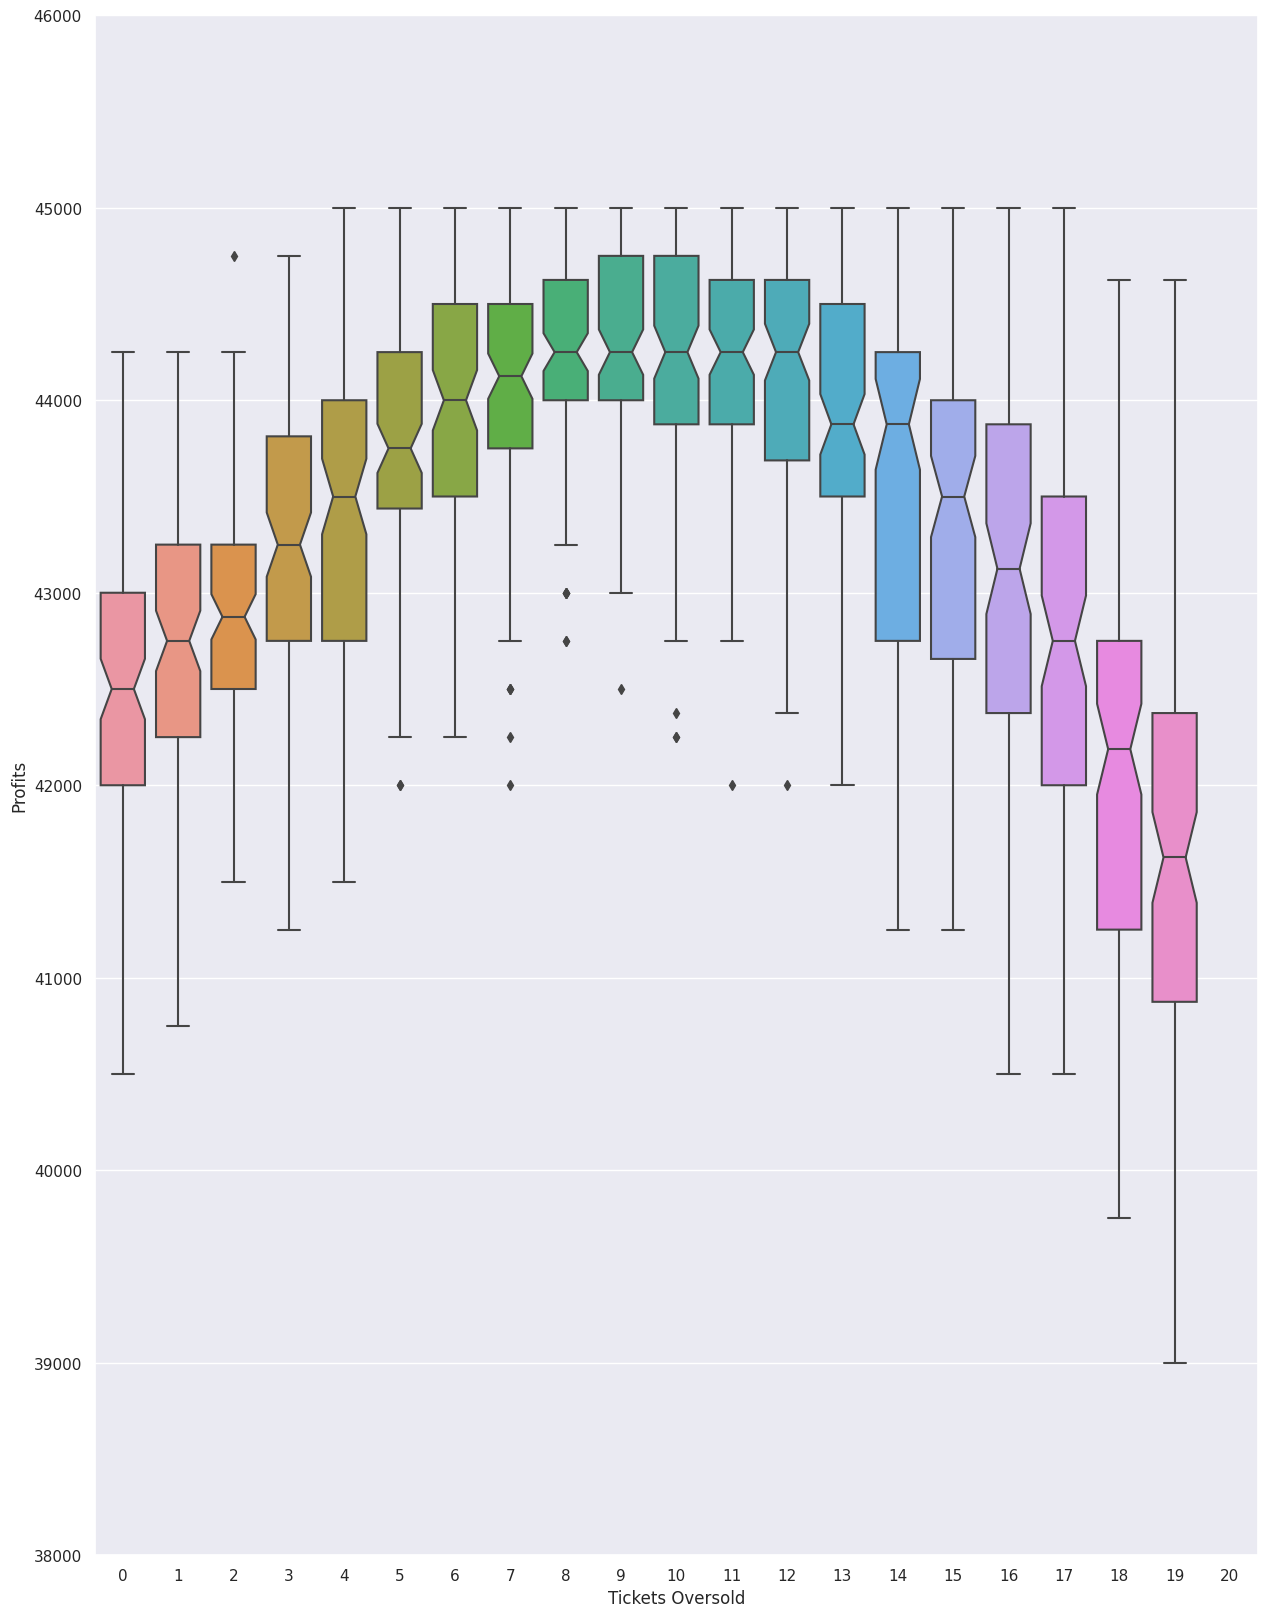

In [17]:
import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb


def GetProbability(Prob):
    if rd.random() <= Prob:
        return True
    else:
        return False


def FlightSimulation(Sold, Prob):
    n = 0
    for i in range(1, Sold):
        if GetProbability(Prob):
            n = n + 1

    return n


def NetProfitSimulation(Profit, TixPrice, Loss, SeatCap, Sold, Prob):
    Total = FlightSimulation(Sold, Prob)
    if Total <= SeatCap:
        return Profit * Total
    else:
        Overbooked = Total - SeatCap
        return (Total * Profit) - (Loss * Overbooked)


Profit = 250  # Profit per ticket
TixPrice = 500
Loss = 1.25 * TixPrice  # Loss due to overbooking penality for each overbooked seat
SeatCap = 180  # Seat capacity of the airplane 

Iter = 100
Max = 20
Profits = np.zeros(shape=(Iter, Max + 1))
Prob = 0.95

for tickets_overbooked in range(0, Max):
    Sold = SeatCap + tickets_overbooked
    for i in range(1, Iter):
        Profits[i, tickets_overbooked] = NetProfitSimulation(Profit, TixPrice, Loss, SeatCap, Sold, Prob)

sb.set()
sb.set(rc={'figure.figsize': (15, 20)})
ax = sb.boxplot(data=Profits, notch=True)
plt.xlabel("Tickets Oversold")
plt.ylabel("Profits")
plt.ylim(38000, 46000)


### EXPLANATION

It repeatedly performs from the situation of full seats to the situation of maximum overbooking.

NetProfitSimulation, FlightSimulation, and GetProbability methods were used to generate the total number of passengers who booked at random (0.95), and the corresponding total ticket sales revenue and excess passenger loss rate were calculated and returned to the Profits array.

Each case simulates Iter (100) times, and the code was written by finding the maximum, minimum, and middle values through the Propits array.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:steelblue">B) Last minute cancellations!</h3>

A passenger is considered a no-show when he/she does not show up at least an hour before the flight. Consider further the scenario where the airline opens up last-minute ticket sales such that a person without a prior booking is able to purchase left-over tickets an hour before the flight is due to leave. These last-minute ticket sales have their prices jacked up by 50\% of the ticket price!

Tweak the functions you defined above (give them different names as well), to include this consideration of last minute ticket sales. Present your results to your boss in the same manner as the above. Compare your results with and without the possibility of last minute ticket sales to conclude which would return higher revenue.

(0.0, 160000.0)

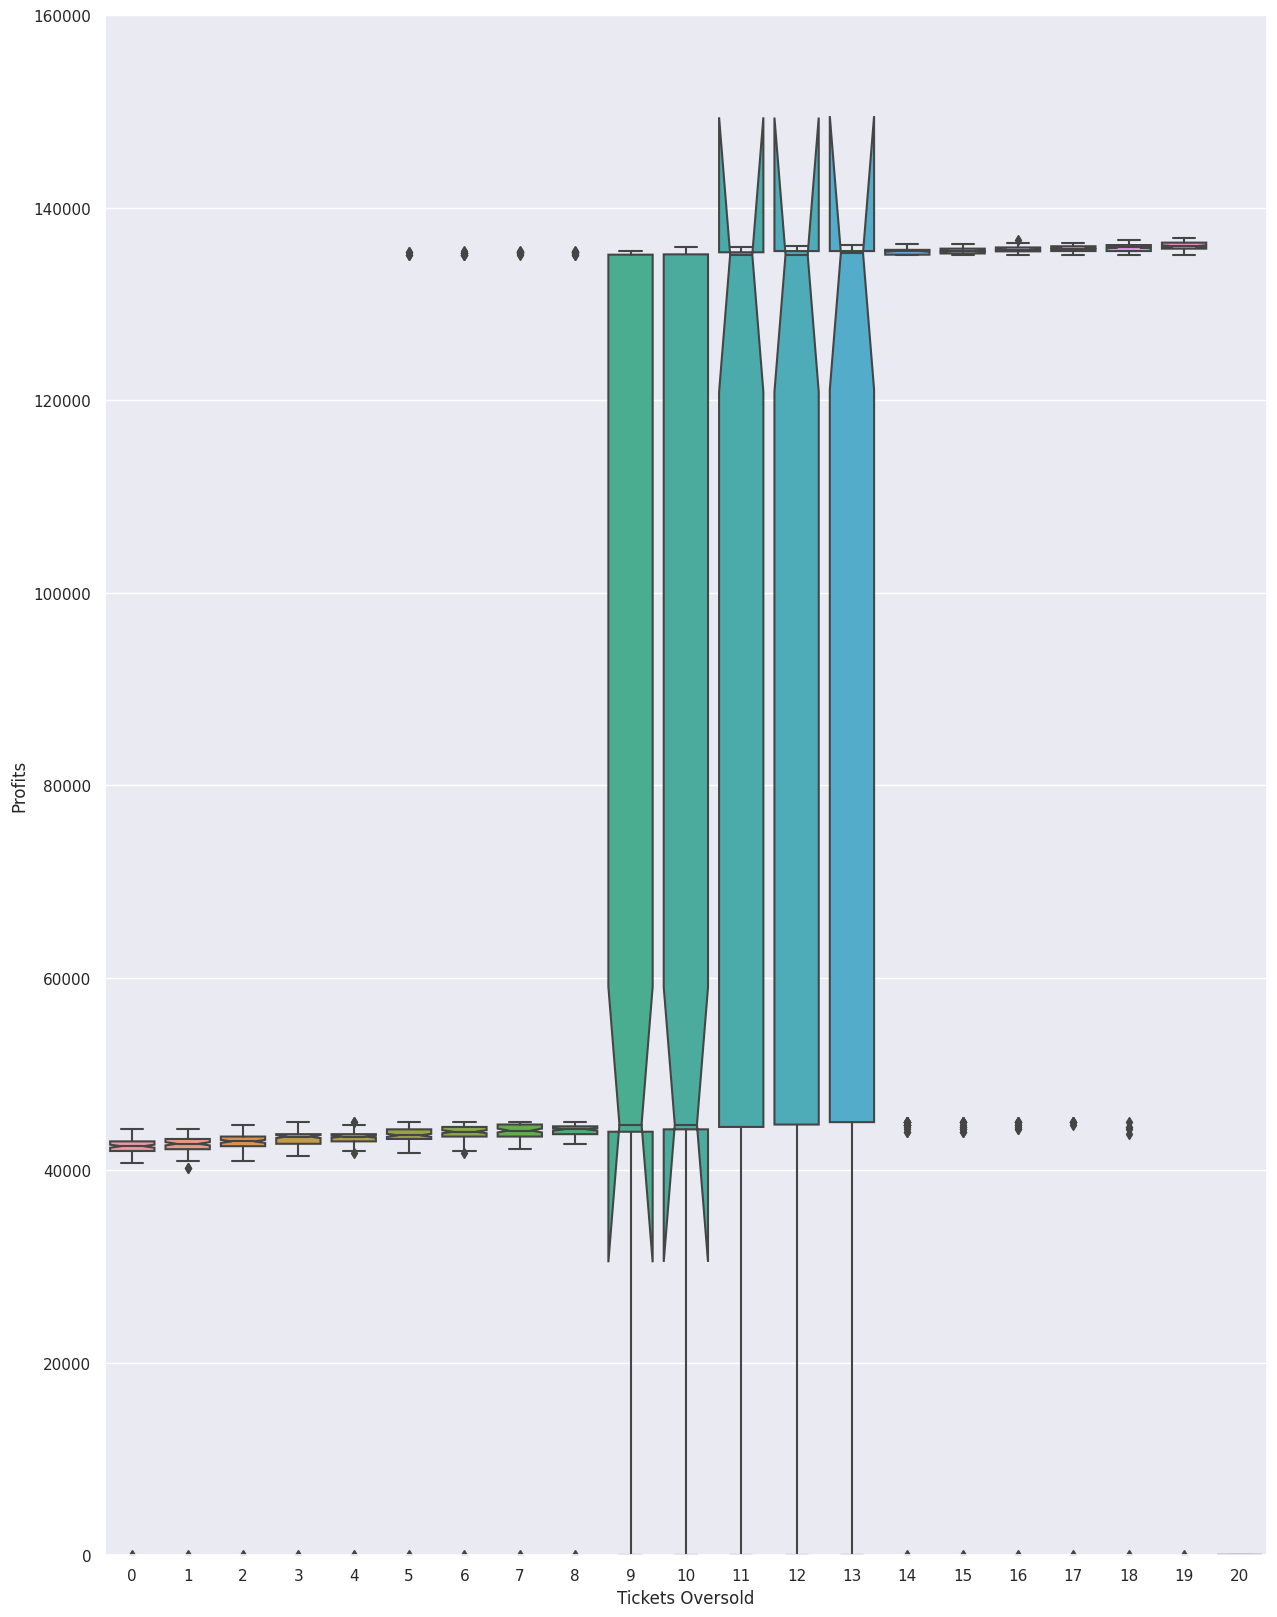

In [16]:
import random as rd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb


def GetProbability(Prob):
    if rd.random() <= Prob:
        return True
    else:
        return False


def FlightSimulation(Sold, Prob):
    n = 0
    for i in range(1, Sold):
        if GetProbability(Prob):
            n = n + 1

    return n


def NetProfitSimulation(Profit, TixPrice, Loss, SeatCap, Sold, Prob, LastMinuteProfit):
    Total = FlightSimulation(Sold, Prob)
    if Total <= SeatCap:
        return Profit * Total
    else:
        Overbooked = Total - SeatCap
        return (Total * LastMinuteProfit) - (Loss * Overbooked)


Profit = 250  # Profit per ticket
TixPrice = 500
Loss = 1.25 * TixPrice  # Loss due to overbooking penality for each overbooked seat
SeatCap = 180  # Seat capacity of the airplane 
LastMinuteProfit = 1.5 * TixPrice

Iter = 100
Max = 20
Profits = np.zeros(shape=(Iter, Max + 1))
Prob = 0.95

for tickets_overbooked in range(0, Max):
    Sold = SeatCap + tickets_overbooked
    for i in range(1, Iter):
        Profits[i, tickets_overbooked] = NetProfitSimulation(Profit, TixPrice, Loss, SeatCap, Sold, Prob,
                                                             LastMinuteProfit)

sb.set()
sb.set(rc={'figure.figsize': (15, 20)})
ax = sb.boxplot(data=Profits, notch=True)
plt.xlabel("Tickets Oversold")
plt.ylabel("Profits")
plt.ylim(0, 160000)


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Problem II: Elementary Cellular Automaton</h2>
    
<h3 style="font-family:chalkduster; color:steelblue">Introduction:</h3>
    
Elementary cellular automaton is a 1D cellular automaton with a sample size of 2. Therefore, states can only be either
    
- Off (0, white in our visualization), or 
- On (1, black in our visualization).
    
The rules that define if a particular state should be designated as on or off in the next generation depends on three cells in the previous generation. Therefore, the state of the cell in column `i` of the next generation (row `j`) depends on the state of the cell in the previous generation (row `j-1`), 
    
- column `i-1` (neighbour immediately to the left)
- column `i` (itself) and
- column `i+1` (neighbour immediately to the right).
    
The easiest way to comprehend the rule is via a decision table similar to the one below with the next generation column filled up with 0 and 1 according to the rule.: 
![image.png](attachment:image.png)    
    
There are 256 rules, as there are that many different combinitions one can have. There are several different ways one could study these cellular automata. The two often cited ways are
    
- Single cell seed, where the "seed" of our cellular automaton with a row of states that have all cells in the off (0) state, except the middle cell, which will be in the on (1) state (see diagram below).
![image-3.png](attachment:image-3.png)
- Random seed, where the "seed" of our cellular automaton with a row of cells randomly chosen to be in 0 or 1. For instance, it could be something like the diagram below.
![image-2.png](attachment:image-2.png)
However, note that it is <b><i>random</i></b>, and therefore each run should return something different.
    
In this problem, we will consider the following 6 rules:

1) Rule 30:
![image-4.png](attachment:image-4.png)
2) Rule 40:
![image-5.png](attachment:image-5.png)
3) Rule 57:
![image-6.png](attachment:image-6.png)
4) Rule 73:
![image-7.png](attachment:image-7.png)    
5) Rule 90:
![image-8.png](attachment:image-8.png)
6) Rule 110:
![image-9.png](attachment:image-9.png)
    


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Project Problem:</h3>
    
Your job is to create the cellular automaton for these 6 rules above and present visualizations with both a a Single Cell Seed and a Random Seed. With the Random Seed visualization, you can further attempt to classify them according to Wolfram's four classes:
    
- Class 1: Cellular automata which rapidly converge to a uniform state.
- Class 2: Cellular automata which rapidly converge to a repetitive or stable state. 
- Class 3: Cellular automata which appear to remain in a random state.
- Class 4: Cellular automata which form areas of repetitive or stable states, but also form structures that interact with each other in complicated ways.
    
You are free to: 

- Present your results in any particular form or order that you like.
    - I will say however that I am fond of subplots as it allows me to see several plots in one go. This makes it a lot easier for us to make comparisons and draw conclusions.
- Determine the size of the visualization you present to me (that is, the size of `t` (rows) and `N` (columns) - see Class III, Block II for reference of what `t` and `N` are.).
    - Note further that you are free to present more than one choice of `t` and `N`.
    
You should assume that your audience is a person has not seen any visualization of these elementary cellular automaton. After spending some time playing around with these 6 rules, how would you summarize the behaviour of the elementary cellular automaton for your audience? Like the boss in question 1 though, no one wants to sit through lots of visualizations with different sizes (i.e. `t` and `N`) in which they don't learn anything new. Each `t` and `N` you showcase should allow them to see something slightly different! If there's nothing different to be seen for all possible `t` and `N`, then there isn't any reason to showcase more than 1!

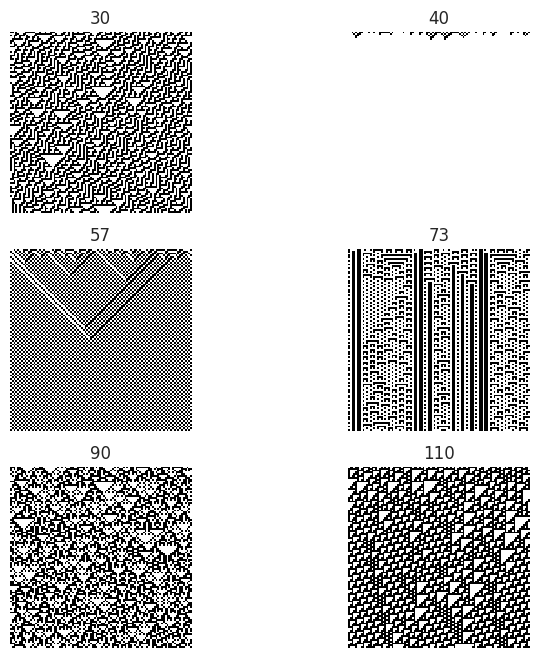

In [21]:
import numpy as np
import matplotlib.pyplot as plt

U = np.array([[4], [2], [1]])


def Step(Rule, X):
    Y = np.vstack((np.roll(X, 1), X, np.roll(X, -1))).astype(np.int8)
    Z = np.sum(Y * U, axis=0).astype(np.int8)

    return Rule[7 - Z]


def generate(Rule, Size=100, Steps=100):
    RuleNext = np.array([int(_) for _ in np.binary_repr(Rule, 8)], dtype=np.int8)
    X = np.zeros((Steps, Size), dtype=np.int8)
    X[0, :] = np.random.rand(Size) < .5
   
    for i in range(Steps - 1):
        X[i + 1, :] = Step(RuleNext, X[i, :])
    
    return X


Figure, Axes = plt.subplots(3, 2, figsize=(8, 8))
Rules = [30, 40, 57, 73, 90, 110]

for ax, rule in zip(Axes.flat, Rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none', cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))


### EXPLANATION

Write a function that performs iterations on the grid to update all cells at once according to a given rule in a binary representation.

The first step consists of stacking a circular shifted grid version to obtain three pairs of LCR (left, center, and right) of each cell (y), converting these triplets to a 3-bit number (z) and calculating the next state of all cells using the specified rules.

Calculate the binary representation (Wolfram Code) of the rule and initialize the first row of the grid with any value. The Step method is then repeatedly applied to the grid.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Bonus!!!:</h3>
    
For those who enjoy these things, you can obtain further bonus marks writing up a function that will take in one integer argument to denote the rule (i.e. the integer 30 for Rule 30). This function would need to convert the integer into binary form (for instance, 30 is 11110), then implement the rule accordingly to output the two graphs of the elementary cellular automaton with that rule.
    
Therefore, with this function, we would be able to visualize all 256 cellular automata without having to rewrite the codes!